## Optimization algorithms: A Quasi-Newtonian tradeoff

#### The term 'Optimization' generally means finding an optimum solution to a given problem. The problem might not be necessarily restricted to a mathematical one (need to expand more on real-world, non-mathematical problems). <br>
#### However, mathematical optimization can be rigorously defined as finding a set of variables in the allowed solution space that minimizes (or alternatively maximizes) the value of a real function (the problem). 

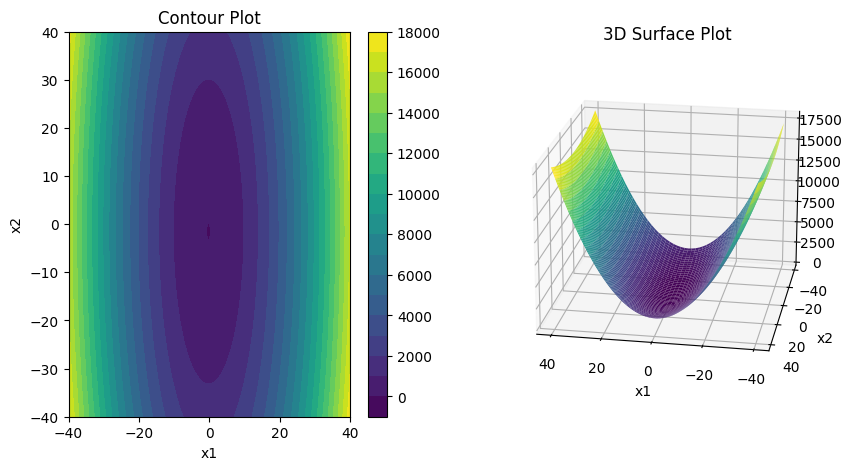

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Define the convex function
def convex_function(x, y):
    a, b = 10, 1  # Coefficients for the quadratic terms
    return a*x**2 + y**2 + 5*x + 3*y
#     return x**2+y**2

# Create a grid of points
x = np.linspace(-40, 40, 1000)
y = np.linspace(-40, 40, 1000)
X, Y = np.meshgrid(x, y)
Z = convex_function(X, Y)

# Plot the contour
plt.figure(figsize=(10, 5))

# 2D contour plot
plt.subplot(1, 2, 1)
contour = plt.contourf(X, Y, Z, 20, cmap='viridis')
# contour_lines = plt.contour(contour, colors='')
plt.title('Contour Plot')
plt.xlabel('x1')
plt.ylabel('x2')
cbar = plt.colorbar(contour)
# cbar.add_lines(contour_lines)

# 3D surface plot
ax = plt.subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('3D Surface Plot')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
# ax.set_zlabel('f(x1, x2)')
ax.view_init(20,100)

plt.savefig('simple example.png', dpi=700)

# plt.tight_layout()
plt.show()


Optimization terminated successfully.
         Current function value: -2.875000
         Iterations: 7
         Function evaluations: 24
         Gradient evaluations: 8


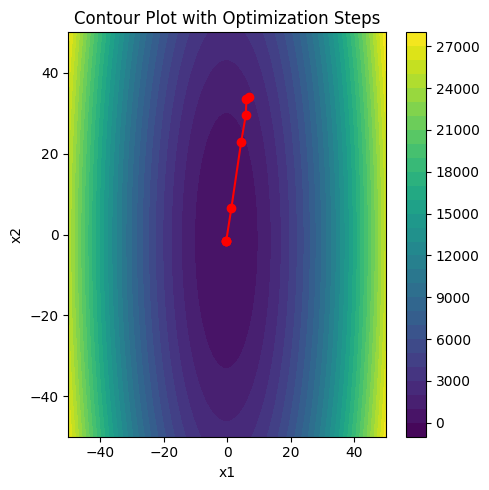

7
[-0.25000001 -1.5       ]
Execution time: 0.0311 seconds
Current memory usage: 0.0075 MB
Peak memory usage: 0.0178 MB


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
import time
import tracemalloc
%matplotlib inline

# Define the convex function
def convex_function(params):
    x, y = params
    return 10*x**2 + y**2 + 5*x + 3*y
#     return np.log10(x**2+y**2)

# Gradient of the convex function
# def gradient(params):
#     x, y = params
#     return np.array([10*y, 6*y])

# def hessian(params):
#     return np.array([[0, 10], [0, 36*y**2]])

# Callback function to store optimization steps
steps = []
def callback(params):
    steps.append(np.copy(params))

# Initial guess for optimization
initial_guess = np.array([7, 34])
steps.append(initial_guess)

# Start time and memory monitoring
tracemalloc.start()
start_time = time.time()

# Perform the optimization using Conjugate Gradient (CG) method
result = minimize(convex_function, initial_guess, method='bfgs', callback=callback, options={'disp':True})

# Measure time and memory
end_time = time.time()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Time and memory information
execution_time = end_time - start_time
memory_usage = current / 10**6  # Convert to MB
peak_memory = peak / 10**6  # Convert to MB

# Create a grid for contour plot
x = np.linspace(-50, 50, 400)
y = np.linspace(-50, 50, 400)
X, Y = np.meshgrid(x, y)
Z = convex_function([X, Y])

# Plotting the results
plt.figure(figsize=(5, 5))

# 2D Contour plot
plt.subplot(1, 1, 1)
contour = plt.contourf(X, Y, Z, levels=30, cmap='viridis')
plt.plot([step[0] for step in steps], [step[1] for step in steps], marker='o', color='red')
plt.title('Contour Plot with Optimization Steps')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(contour)
# plt.savefig('test bfgs log function 1.png', dpi=700)

# # 3D Surface plot
# ax = plt.subplot(1, 2, 2, projection='3d')
# ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
# ax.plot([step[0] for step in steps], [step[1] for step in steps], 
#         [convex_function(step) for step in steps], marker='o', color='red')
# ax.set_title('3D Surface Plot with Optimization Steps')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('f(x, y)')

plt.tight_layout()
plt.show()
print(len(steps)-1)
print(steps[-1])

# Print memory and time information
print(f"Execution time: {execution_time:.4f} seconds")
print(f"Current memory usage: {memory_usage:.4f} MB")
print(f"Peak memory usage: {peak_memory:.4f} MB")


In [14]:
from sympy import diff, ln, log
from sympy.abc import x,y
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
import time
import tracemalloc
%matplotlib inline

In [15]:
def convex_function():
    f = 10*x**2 + y**2 + 5*x + 3*y
    return f

In [16]:
print(convex_function())

10*x**2 + 5*x + y**2 + 3*y


10*x**2 + 5*x + y**2 + 3*y
Initial paramters  [ 7 34]
[[20.  0.]
 [ 0.  2.]]
Iteration number 1
Updated parameter  [-0.250000000000000 -1.50000000000000]
value of function as this step  -2.87500000000000
difference  -1785.87500000000
[[20.  0.]
 [ 0.  2.]]
Iteration number 2
Updated parameter  [-0.250000000000000 -1.50000000000000]
value of function as this step  -2.87500000000000
difference  0
steps  [array([ 7, 34]), array([-0.250000000000000, -1.50000000000000], dtype=object), array([-0.250000000000000, -1.50000000000000], dtype=object)]
Execution time: 0.0052 seconds per step
Current memory usage: 0.0391 MB
Peak memory usage: 0.0167 MB per step


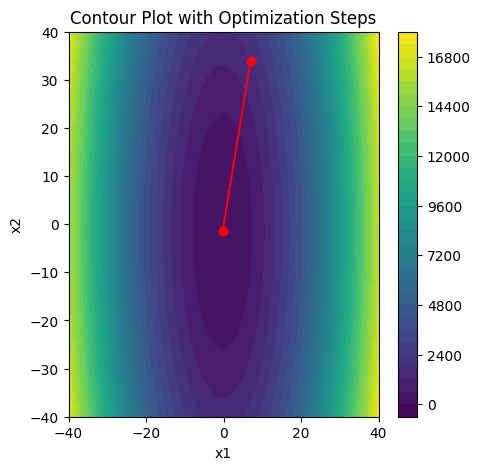

In [19]:
def newton_minimize(function,initial_params, max_iter=500):
    print(function())
    steps = []
    initial_params = np.array(initial_params)
    print('Initial paramters ', initial_params)
    steps.append(initial_params)
    for i in range(max_iter):
        f_initial = function().subs([(x,initial_params[0]),(y, initial_params[1])])
        d_x = diff(function(), x)
        d_y = diff(function(), y)
        jacobian = np.array([d_x.subs([(x, initial_params[0]),(y, initial_params[1])]), 
                             d_y.subs([(x, initial_params[0]),(y, initial_params[1])])])
        d_x_x = diff(d_x, x)
        d_y_y = diff(d_y, y)
        d_x_y = diff(d_x, y)
        d_y_x = diff(d_y, x)
        hessian = np.array([[d_x_x.subs([(x, initial_params[0]),(y, initial_params[1])]), d_x_y.subs([(x, initial_params[0]),(y, initial_params[1])])],
                            [d_y_x.subs([(x, initial_params[0]),(y, initial_params[1])]), d_y_y.subs([(x, initial_params[0]),(y, initial_params[1])])]])
        
        hessian = np.float64(hessian)
        next_step = initial_params - np.linalg.inv(hessian)@jacobian
        f_final = function().subs([(x,next_step[0]),(y, next_step[1])])
        steps.append(next_step)
        
        print(hessian)
        
        print(f'Iteration number {i+1}')
        print('Updated parameter ', next_step)
        print('value of function as this step ', f_final)
        
        print('difference ', f_final-f_initial)
        
        if abs(f_final-f_initial)<=0.01:
            break
        
        initial_params = next_step

    print('steps ',steps)
    return steps

tracemalloc.start()
start_time = time.time()

steps = newton_minimize(convex_function, (7,34))
end_time = time.time()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Time and memory information
execution_time = end_time - start_time
memory_usage = current / 10**6  # Convert to MB
peak_memory = peak / 10**6  # Convert to MB

# Print memory and time information
print(f"Execution time: {execution_time/len(steps):.4f} seconds per step")
print(f"Current memory usage: {memory_usage:.4f} MB")
print(f"Peak memory usage: {peak_memory/len(steps):.4f} MB per step")

plt.figure(figsize=(5, 5))

# 2D Contour plot
plt.subplot(1, 1, 1)
contour = plt.contourf(X, Y, Z, levels=30, cmap='viridis')
plt.plot([step[0] for step in steps], [step[1] for step in steps], marker='o', color='red')
plt.title('Contour Plot with Optimization Steps')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(contour)
plt.savefig('newton method log contour.png', dpi=700)
        

10*x**2 + 5*x + y**2 + 3*y
Initial paramters  [ 7 34]
[145.  71.]
Iteration number 1
Updated parameter  [-1.7  29.74]
value of function as this step  994.087600000000
difference  -788.912400000000
[-29.    62.48]
Iteration number 2
Updated parameter  [ 0.04   25.9912]
value of function as this step  753.732077440000
difference  -240.355522560000
[ 5.8    54.9824]
Iteration number 3
Updated parameter  [-0.308    22.692256]
value of function as this step  582.423890369536
difference  -171.308187070464
[-1.16     48.384512]
Iteration number 4
Updated parameter  [-0.2384     19.78918528]
value of function as this step  450.355755486169
difference  -132.068134883367
[ 0.232      42.57837056]
Iteration number 5
Updated parameter  [-0.25232    17.23448305]
value of function as this step  348.105908839849
difference  -102.249846646320
[-0.0464     37.46896609]
Iteration number 6
Updated parameter  [-0.249536   14.98634508]
value of function as this step  268.924576277234
difference  -79.181332

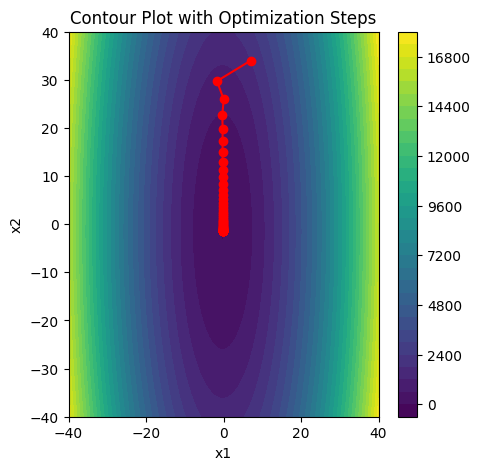

In [23]:
def gradient_descent_minimize(function,initial_params, alpha, max_iter=500):
    print(function())
    steps = []
    initial_params = np.array(initial_params)
    print('Initial paramters ', initial_params)
    steps.append(initial_params)
    for i in range(max_iter):
        f_initial = function().subs([(x,initial_params[0]),(y, initial_params[1])])
        d_x = diff(function(), x)
        d_y = diff(function(), y)
        jacobian = np.array([d_x.subs([(x, initial_params[0]),(y, initial_params[1])]), 
                             d_y.subs([(x, initial_params[0]),(y, initial_params[1])])])
        jacobian = np.float64(jacobian)
        print(jacobian)
        
        next_step = initial_params - alpha*jacobian
        f_final = function().subs([(x,next_step[0]),(y, next_step[1])])
        steps.append(next_step)
        
        print(f'Iteration number {i+1}')
        print('Updated parameter ', next_step)
        print('value of function as this step ', f_final)
        
        print('difference ', f_final-f_initial)
        
        if abs(f_final-f_initial)<=0.001:
            break
        
        initial_params = next_step

    print('Number of total iterations ', len(steps))
    print('Solution: ', steps[-1])
    return steps

tracemalloc.start()
start_time = time.time()

steps = gradient_descent_minimize(convex_function, (7,34), alpha=0.06)
end_time = time.time()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Time and memory information
execution_time = end_time - start_time
memory_usage = current / 10**6  # Convert to MB
peak_memory = peak / 10**6  # Convert to MB

# Print memory and time information
print(f"Execution time: {execution_time/len(steps):.4f} seconds per step")
print(f"Current memory usage: {memory_usage:.4f} MB")
print(f"Peak memory usage: {peak_memory/len(steps):.4f} MB per step")

plt.figure(figsize=(5, 5))

# 2D Contour plot
plt.subplot(1, 1, 1)
contour = plt.contourf(X, Y, Z, levels=30, cmap='viridis')
plt.plot([step[0] for step in steps], [step[1] for step in steps], marker='o', color='red')
plt.title('Contour Plot with Optimization Steps')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(contour)
plt.savefig('gradient descent own implementation contour.png', dpi=700)

In [24]:
def bfgs_minimize(function,initial_params, alpha, max_iter=500):
    print(function())
    steps = []
    initial_params = np.array(initial_params)
    print('Initial paramters ', initial_params)
    steps.append(initial_params)
    for i in range(max_iter):
        f_initial = function().subs([(x,initial_params[0]),(y, initial_params[1])])
        d_x = diff(function(), x)
        d_y = diff(function(), y)
        jacobian = np.array([d_x.subs([(x, initial_params[0]),(y, initial_params[1])]), 
                             d_y.subs([(x, initial_params[0]),(y, initial_params[1])])])
        jacobian = np.float64(jacobian)
#         print(jacobian)
        
        if i==0:
            hessian_prev = np.identity(2)
            jacobian_prev = np.zeros((2,2))
            step_prev = np.array([0,0])
            
        gradient_diff = jacobian-jacobian_prev
        step_diff = initial_params-step_prev
        
        step_grad_cross = np.cross(step_diff, gradient_diff)
        grad_step_cross = np.cross(gradient_diff, step_diff)
        grad_step_dot = np.dot(gradient_diff, step_diff)
        step_step_cross = np.cross(step_diff, step_diff)
        
        hessian =(np.identity(2)-step_grad_cross/grad_step_dot)@np.linalg.inv(hessian_prev)@(np.identity(2)-grad_step_cross/grad_step_dot) + step_step_cross/grad_step_dot
        
        print(hessian)
        print(jacobian)
        
        if i==0:
            next_step = initial_params - alpha*jacobian
        else:
            next_step = initial_params + hessian@jacobian
            
        
        f_final = function().subs([(x,next_step[0]),(y, next_step[1])])
        steps.append(next_step)
        
        print(f'Iteration number {i+1}')
        print('Updated parameter ', next_step)
        print('value of function as this step ', f_final)
        
        print('difference ', f_final-f_initial)
        
        if abs(f_final-f_initial)<=0.001:
            break
        step_prev = initial_params
        jacobian_prev = jacobian
        hessian_prev = hessian
        initial_params = next_step

    print('Number of total iterations ', len(steps))
    print('Solution: ', steps[-1])
    return steps

tracemalloc.start()
start_time = time.time()

steps = bfgs_minimize(convex_function, (7,34), alpha=0.06)
end_time = time.time()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Time and memory information
execution_time = end_time - start_time
memory_usage = current / 10**6  # Convert to MB
peak_memory = peak / 10**6  # Convert to MB

# Print memory and time information
print(f"Execution time: {execution_time/len(steps):.4f} seconds per step")
print(f"Current memory usage: {memory_usage:.4f} MB")
print(f"Peak memory usage: {peak_memory/len(steps):.4f} MB per step")

plt.figure(figsize=(5, 5))

# 2D Contour plot
plt.subplot(1, 1, 1)
contour = plt.contourf(X, Y, Z, levels=30, cmap='viridis')
plt.plot([step[0] for step in steps], [step[1] for step in steps], marker='o', color='red')
plt.title('Contour Plot with Optimization Steps')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(contour)
plt.savefig('BFGS own implementation contour.png', dpi=700)

10*x**2 + 5*x + y**2 + 3*y
Initial paramters  [ 7 34]
[[-2.34264679 -3.34264679]
 [-3.34264679 -2.34264679]]
[145.  71.]
Iteration number 1
Updated parameter  [-1.7  29.74]
value of function as this step  994.087600000000
difference  -788.912400000000
[[ 0.47721109 -0.52278891]
 [-0.52278891  0.47721109]]
[-29.    62.48]
Iteration number 2
Updated parameter  [-48.20297262  74.71702738]
value of function as this step  28801.0360909119
difference  27806.9484909119
[[17.33381917 16.33381917]
 [16.33381917 17.33381917]]
[-959.05945233  152.43405477]
Iteration number 3
Updated parameter  [-14182.53580442 -12948.12229732]
value of function as this step  2178987332.41656
difference  2178958531.38047
[[ 0.48014614 -0.51985386]
 [-0.51985386  0.48014614]]
[-283645.71608837  -25893.24459464]
Iteration number 4
Updated parameter  [-136913.22776317  122073.65723767]
value of function as this step  202353978811.501
difference  200174991479.085
[[27.20007491 26.20007491]
 [26.20007491 27.20007491]]


Iteration number 40
Updated parameter  [-8.40156656e+80  6.80818427e+80]
value of function as this step  7.52214579716202e+162
difference  7.44390156592551e+162
[[182.08982903 181.08982903]
 [181.08982903 182.08982903]]
[-1.68031331e+82  1.36163685e+81]
Iteration number 41
Updated parameter  [-2.81394121e+84 -2.79425546e+84]
value of function as this step  8.69905148341221e+169
difference  8.69905073119763e+169
[[ 0.4977292 -0.5022708]
 [-0.5022708  0.4977292]]
[-5.62788242e+85 -5.58851093e+84]
Iteration number 42
Updated parameter  [-2.80186097e+85  2.26913893e+85]
value of function as this step  8.36532404404682e+171
difference  8.27833352921269e+171
[[190.58676474 189.58676474]
 [189.58676474 190.58676474]]
[-5.60372194e+86  4.53827786e+85]
Iteration number 43
Updated parameter  [-9.8223568e+88 -9.7567103e+88]
value of function as this step  1.05998032610132e+179
difference  1.05998024244808e+179
[[ 0.49782905 -0.50217095]
 [-0.50217095  0.49782905]]
[-1.96447136e+90 -1.95134206e+89

TypeError: Invalid NaN comparison